In [ ]:
#BUG There's an issue with the data for 'alexander-tt' not matching up with the data from https://amrdcdata.ssec.wisc.edu/dataset/antaws-dataset

In [1]:
#Importing Packages
import xarray as xr
import arviz as az
import numpy as np
import datetime

from src.helper_functions import grid_coords_to_2d_latlon_coords

In [3]:
#Loading Climate Data
base_path = '/home/jez/'
metum_path = f'{base_path}DSNE_ice_sheets/Antarctic_CORDEX/MetUM/044_3hourly/'
filename = f'Antarctic_CORDEX_MetUM_0p44deg_3-hourly_tas_{1990}.nc'
path_climate = f'{metum_path}{filename}'
path_obs = f'{base_path}Bias_Correction/data/ProcessedData/NST_Observations_Subset.nc'

ds_climate = xr.open_dataset(path_climate)
ds_climate = grid_coords_to_2d_latlon_coords(ds_climate,path_climate)
ds_obs = xr.open_dataset(path_obs)


In [58]:
ds_site = ds_obs.isel(Station_Lower=0)
years = ds_site.Year.data
days = ds_site.Day_of_Month.data
month = ds_site.Month.data
months = np.full(years.shape,month)

def calculate_time(year,month,day):
    if np.isnan(year):
        calctime = np.nan
    else:
        calctime = datetime.datetime(year=int(year), month=int(month), day=int(day))
    return(calctime)

times = np.array([calculate_time(y,m,d) for y,m,d in zip(years,months,days)])
ds_site = ds_site.assign_coords(time=("Day", times))

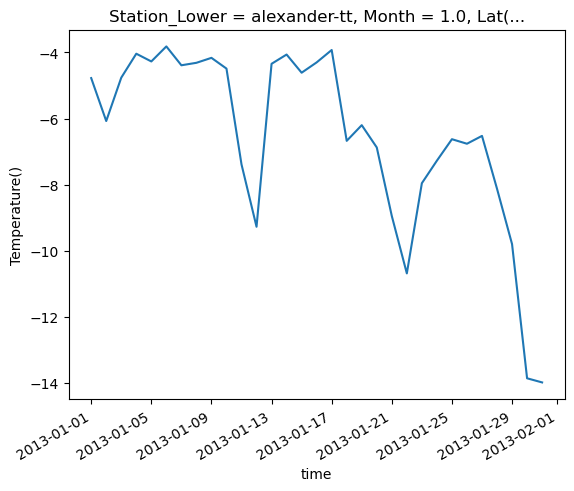

In [59]:
ds_site['Temperature()'].plot(x='time')

In [ ]:
#NOTE Above shows non-nan temperatures only for 2013, whereas initial data seems to have non-nans for 2011!